In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from background import Background
from Potential import Potential_function
plt.style.use('style')
from pathlib import Path

Bad value in file PosixPath('/Users/flaviopineda/.matplotlib/stylelib/style.mplstyle'), line 50 ("axes.prop_cycle : cycler('color', ['#1F77B4', '#D62728', '#2CA02C', '#FF7F0E', '#7F7F7F', '#9467BD'])"): Key axes.prop_cycle: "cycler('color', ['" is not a valid cycler construction: EOL while scanning string literal (<unknown>, line 1)


In [2]:
# Ruta a Figures desde el notebook actual
fig_dir = Path.cwd().parents[1] / "Paper" / "Figures"
fig_dir.mkdir(parents=True, exist_ok=True)

def savefig(name, ext="pdf"):
    from pathlib import Path
    import matplotlib.pyplot as plt

    fig_dir = Path.cwd().parents[1] / "Paper" / "Figures"
    fig_dir.mkdir(parents=True, exist_ok=True)
    path = fig_dir / f"{name}.{ext}"
    plt.savefig(path, bbox_inches="tight", dpi=300)
    print(f"✅ Figura guardada en {path}")

In [3]:
V = 'exp(-sqrt(8/3)*phi)*(lambda_h*h**4/4 + (1/(16*xi_s))*(exp(sqrt(2/3)*phi) - 1 - xi*h**2)**2)'
parameters = {'lambda_h': 1e-10, 'xi': 0.1, 'xi_s': 4e8}
potential = Potential_function.from_string(V, param_values=parameters)

In [4]:
#Extrayendo datos de la clase background
bg = Background(potential, lambda_h= 1e-10, xi = 0.1, xi_s = 4e8)

In [5]:
vars = ['N', 'phi', 'dphidN', 'h', 'dhdN', 'H', 'a', 'aH', 'eps_H', 'dotsigma', 'eta_perp', 'eta_sigma', 'xi_perp', 'm_iso']
N, phi, dphidN, h, dhdN, H, a, aH, eps_H, dotsigma, eta_perp, eta_sigma, xi_perp, m_iso = (bg.data[i] for i in vars)
Nend = bg.N_end
Nend

np.float64(81.88188188188188)

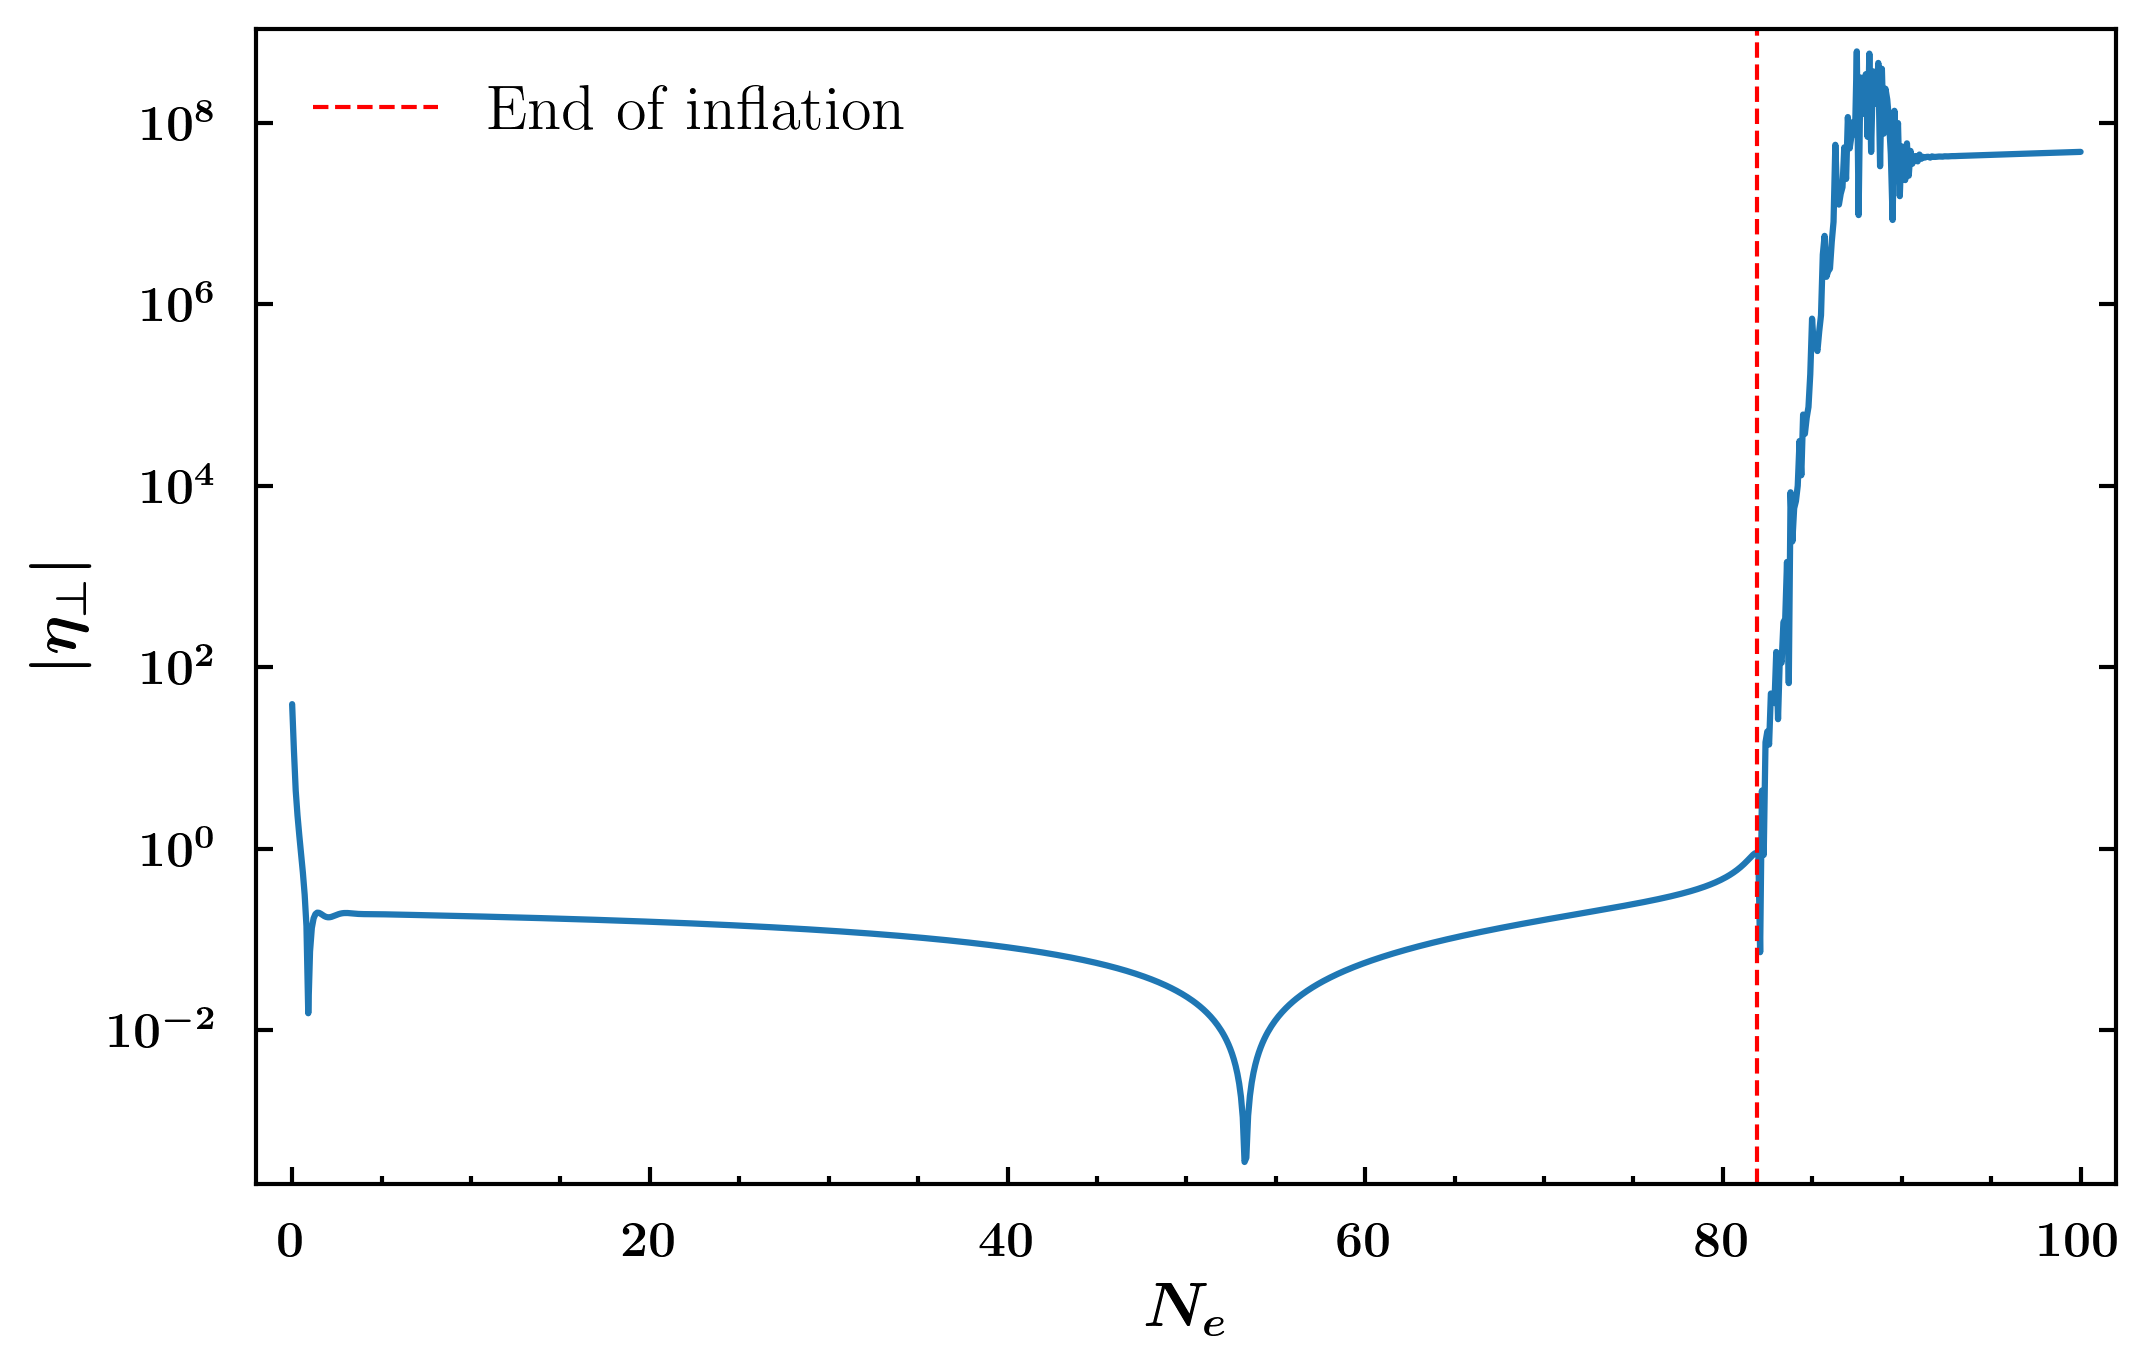

In [6]:
plt.semilogy(N, abs(eta_sigma))
plt.axvline(Nend, linestyle = 'dashed', linewidth= 1, color = 'r', label = 'End of inflation')
plt.xlabel(r"$N_e$")
plt.ylabel(r"$|\eta_\perp|$")
plt.legend()
#savefig('bending1')

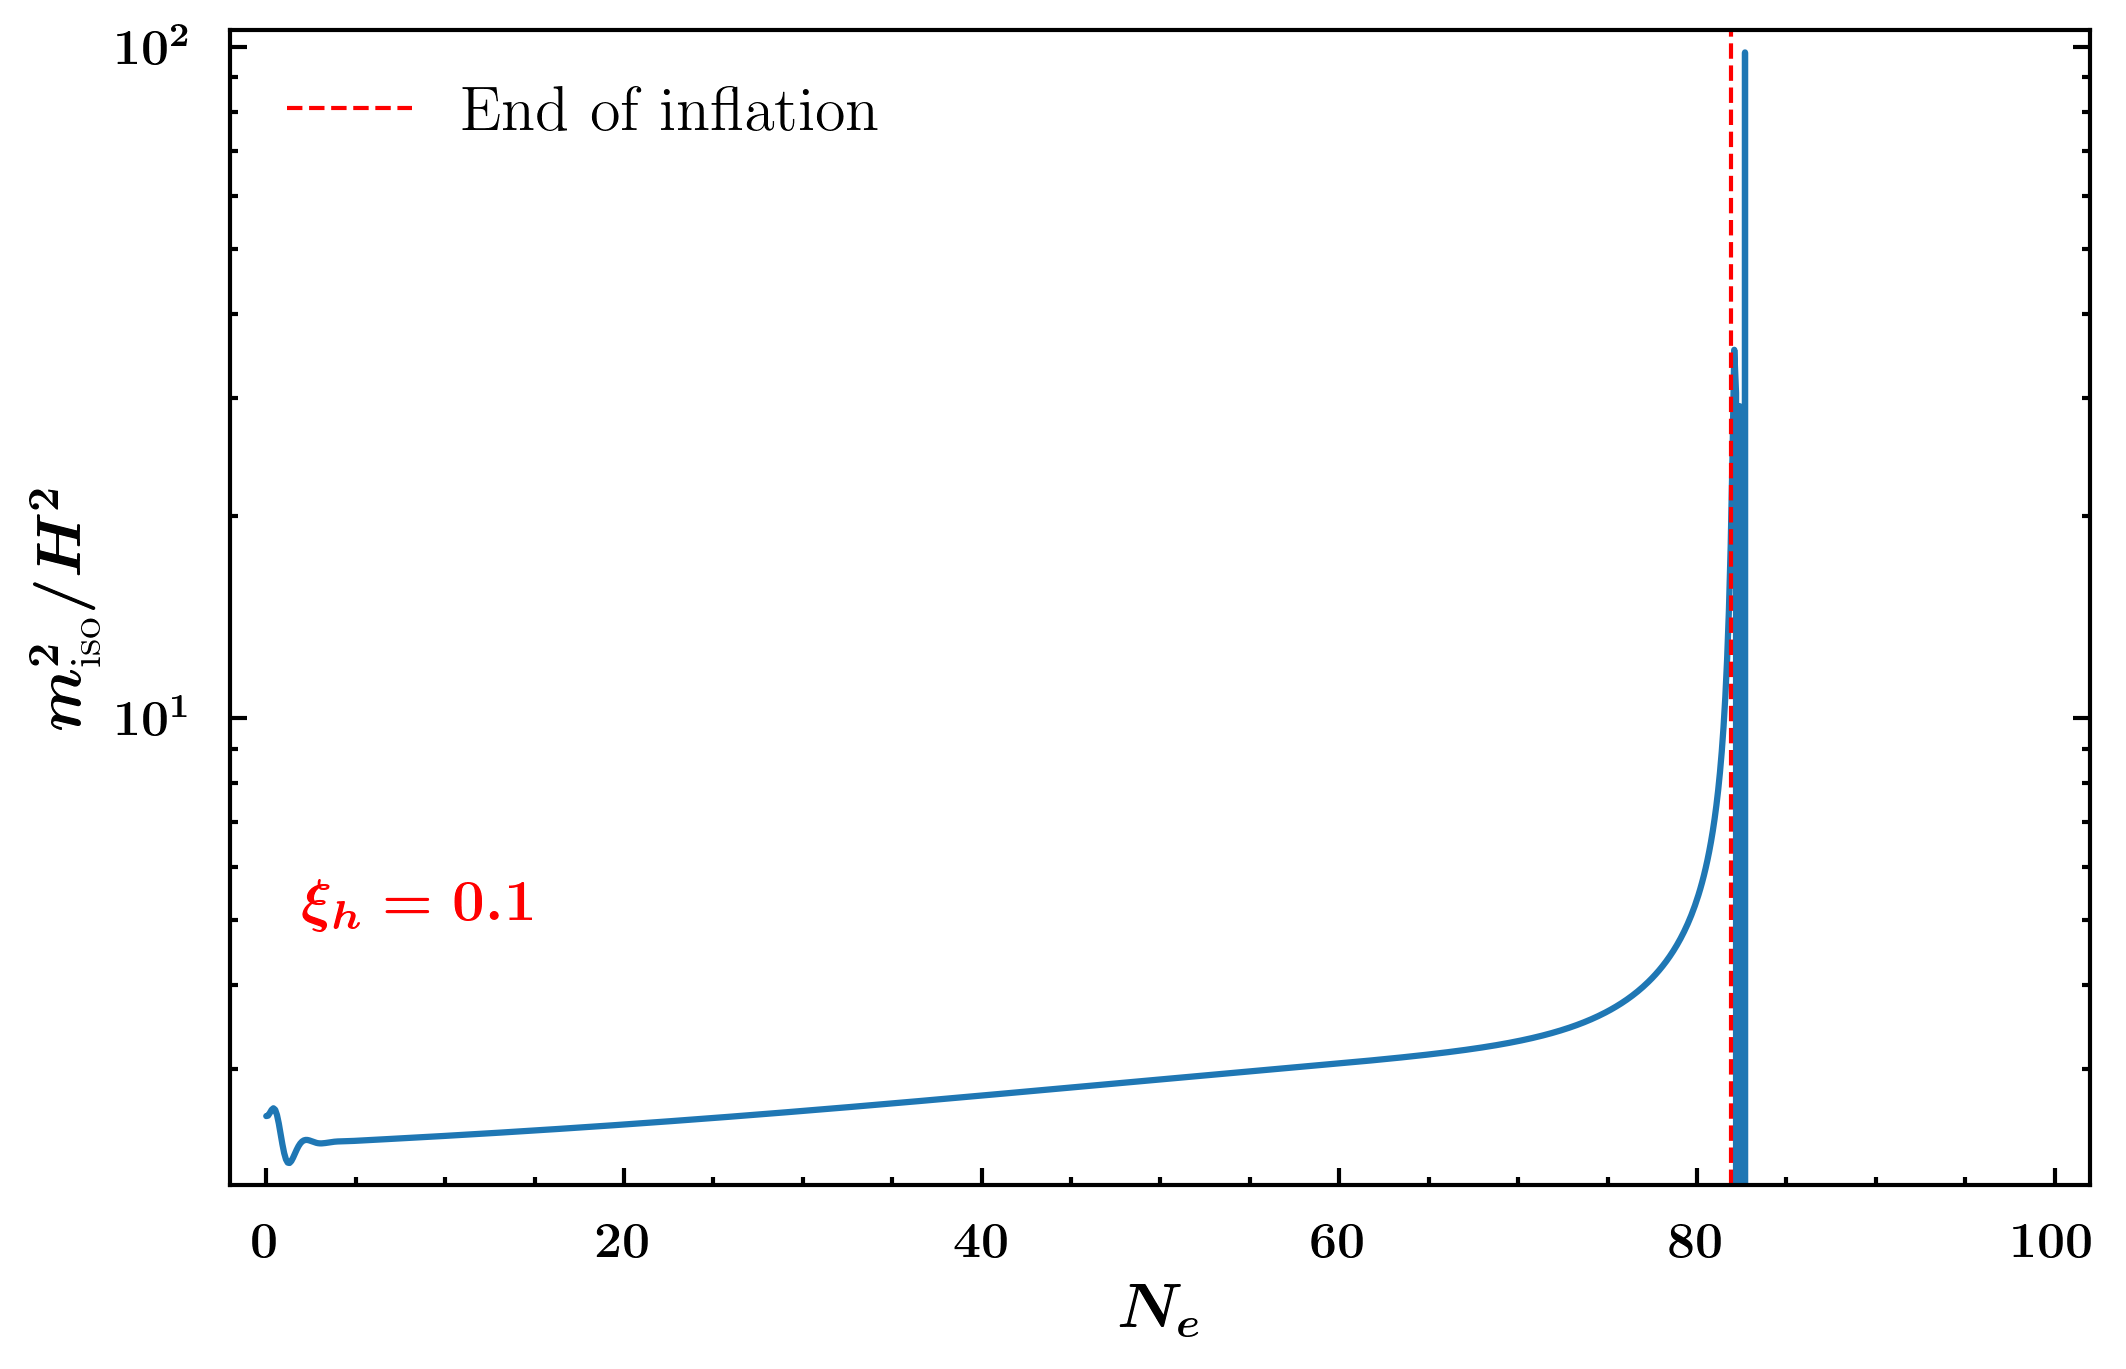

In [7]:
plt.semilogy(N, m_iso/H**2)
plt.axvline(Nend, linestyle = 'dashed', linewidth= 1, color = 'r', label = 'End of inflation')
plt.text(2, 5, r"$\xi_h = 0.1$", fontsize=14, color='red')

plt.xlabel(r"$N_e$")
plt.ylabel(r"$m_\text{iso}^2/H^2$")
plt.legend()
#savefig('isomass1')

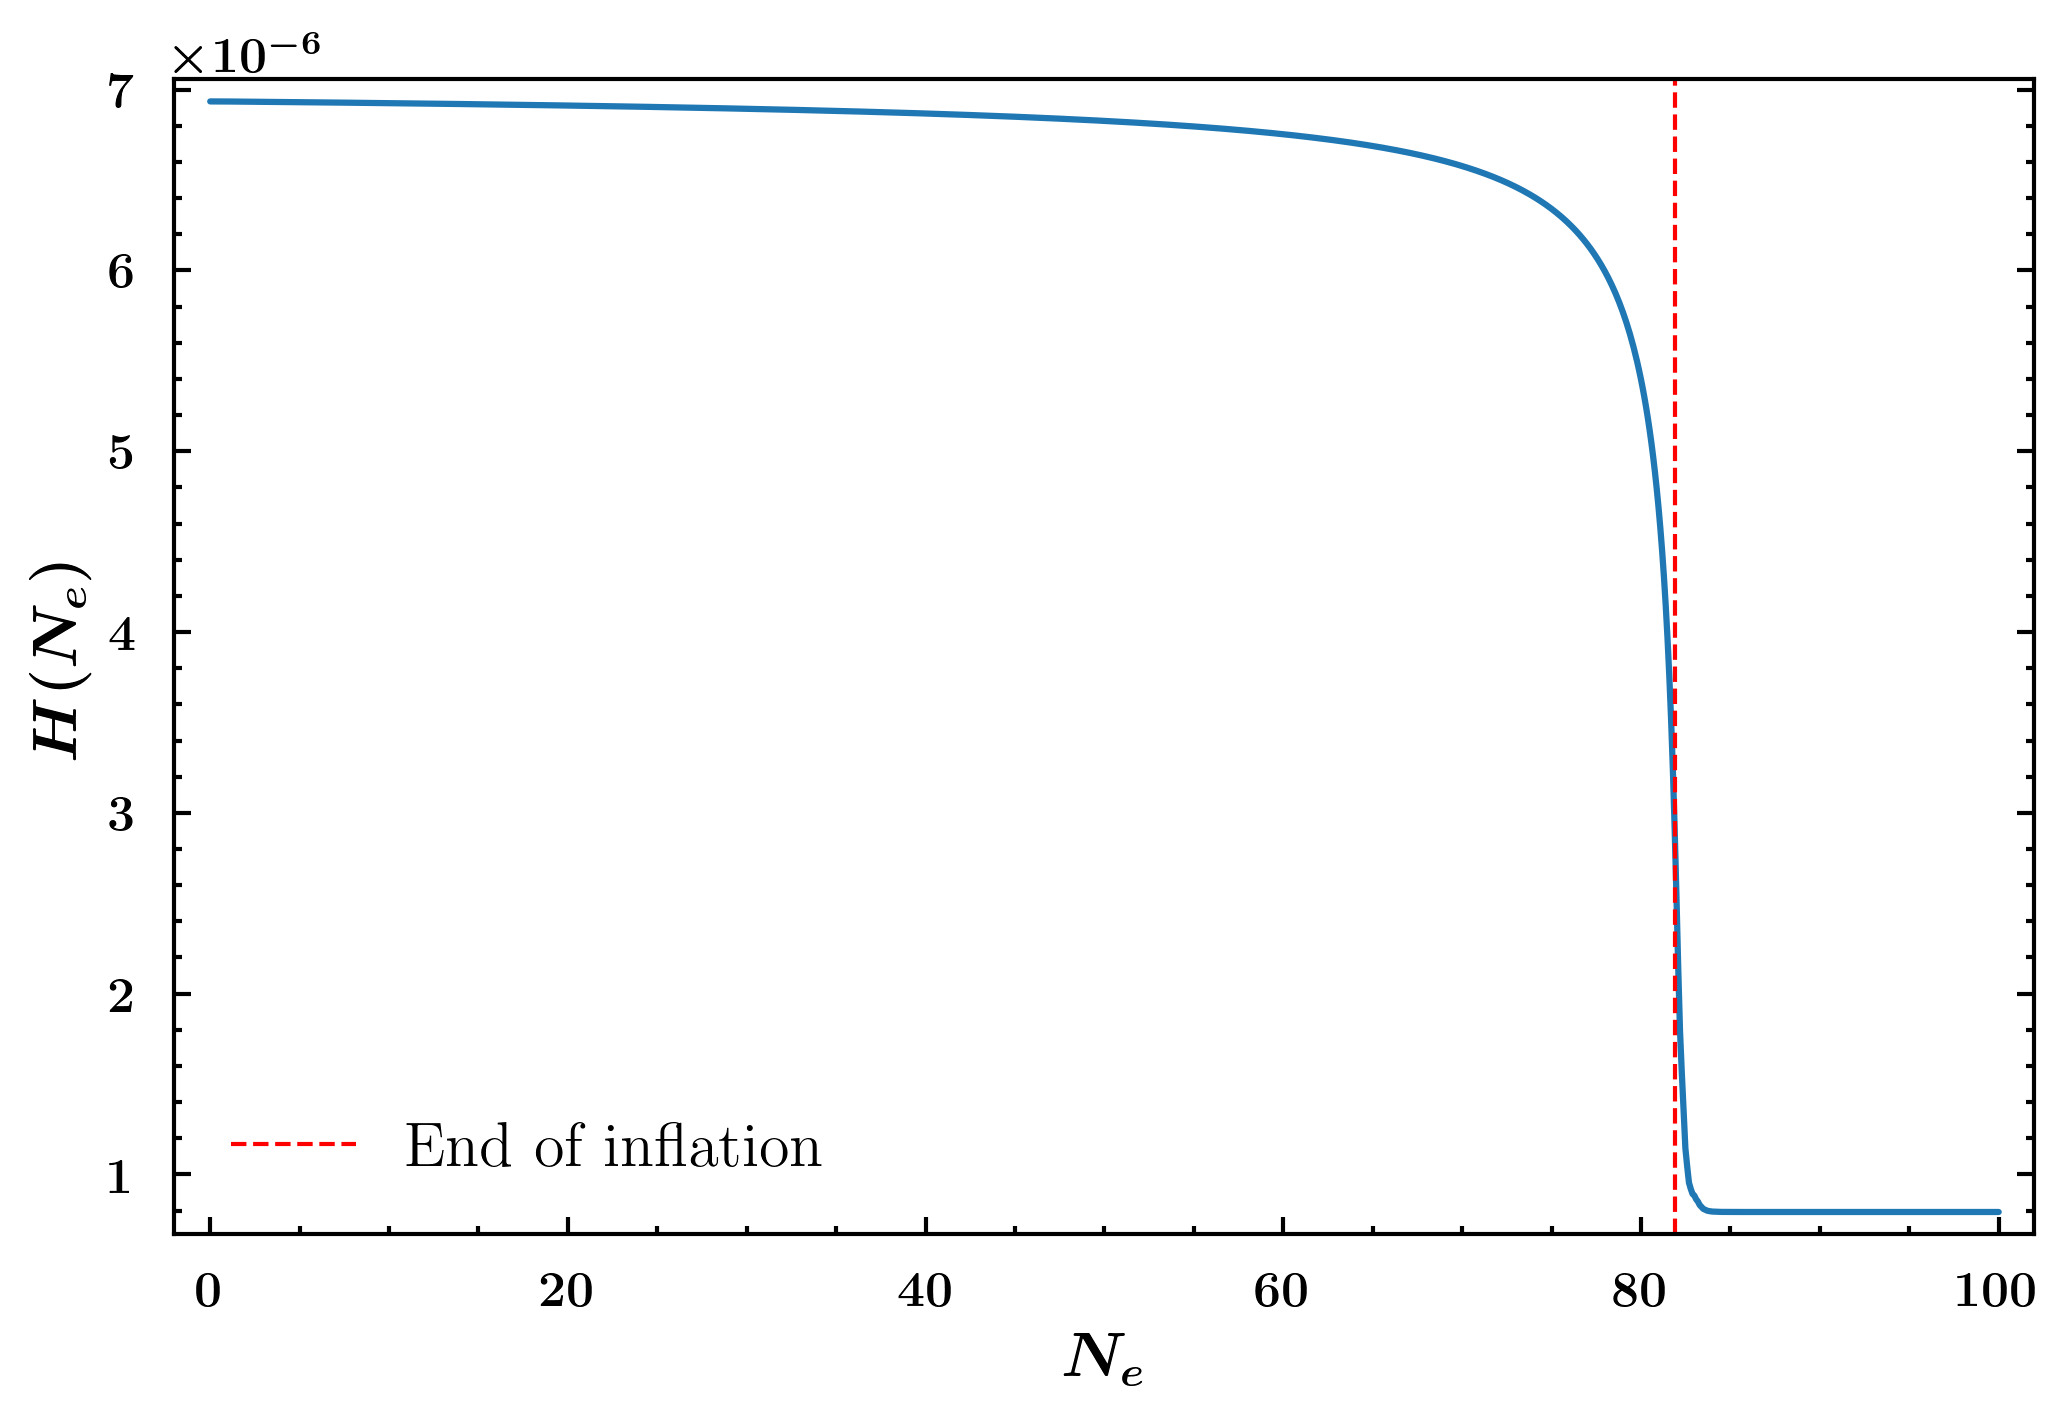

In [8]:
plt.plot(N, H)
plt.axvline(Nend, linestyle = 'dashed', linewidth= 1, color = 'r', label = 'End of inflation')
plt.xlabel(r"$N_e$")
plt.ylabel(r"$H(N_e)$")
plt.legend()
#savefig('hubbleparameter1')

(0.0, 86.0)

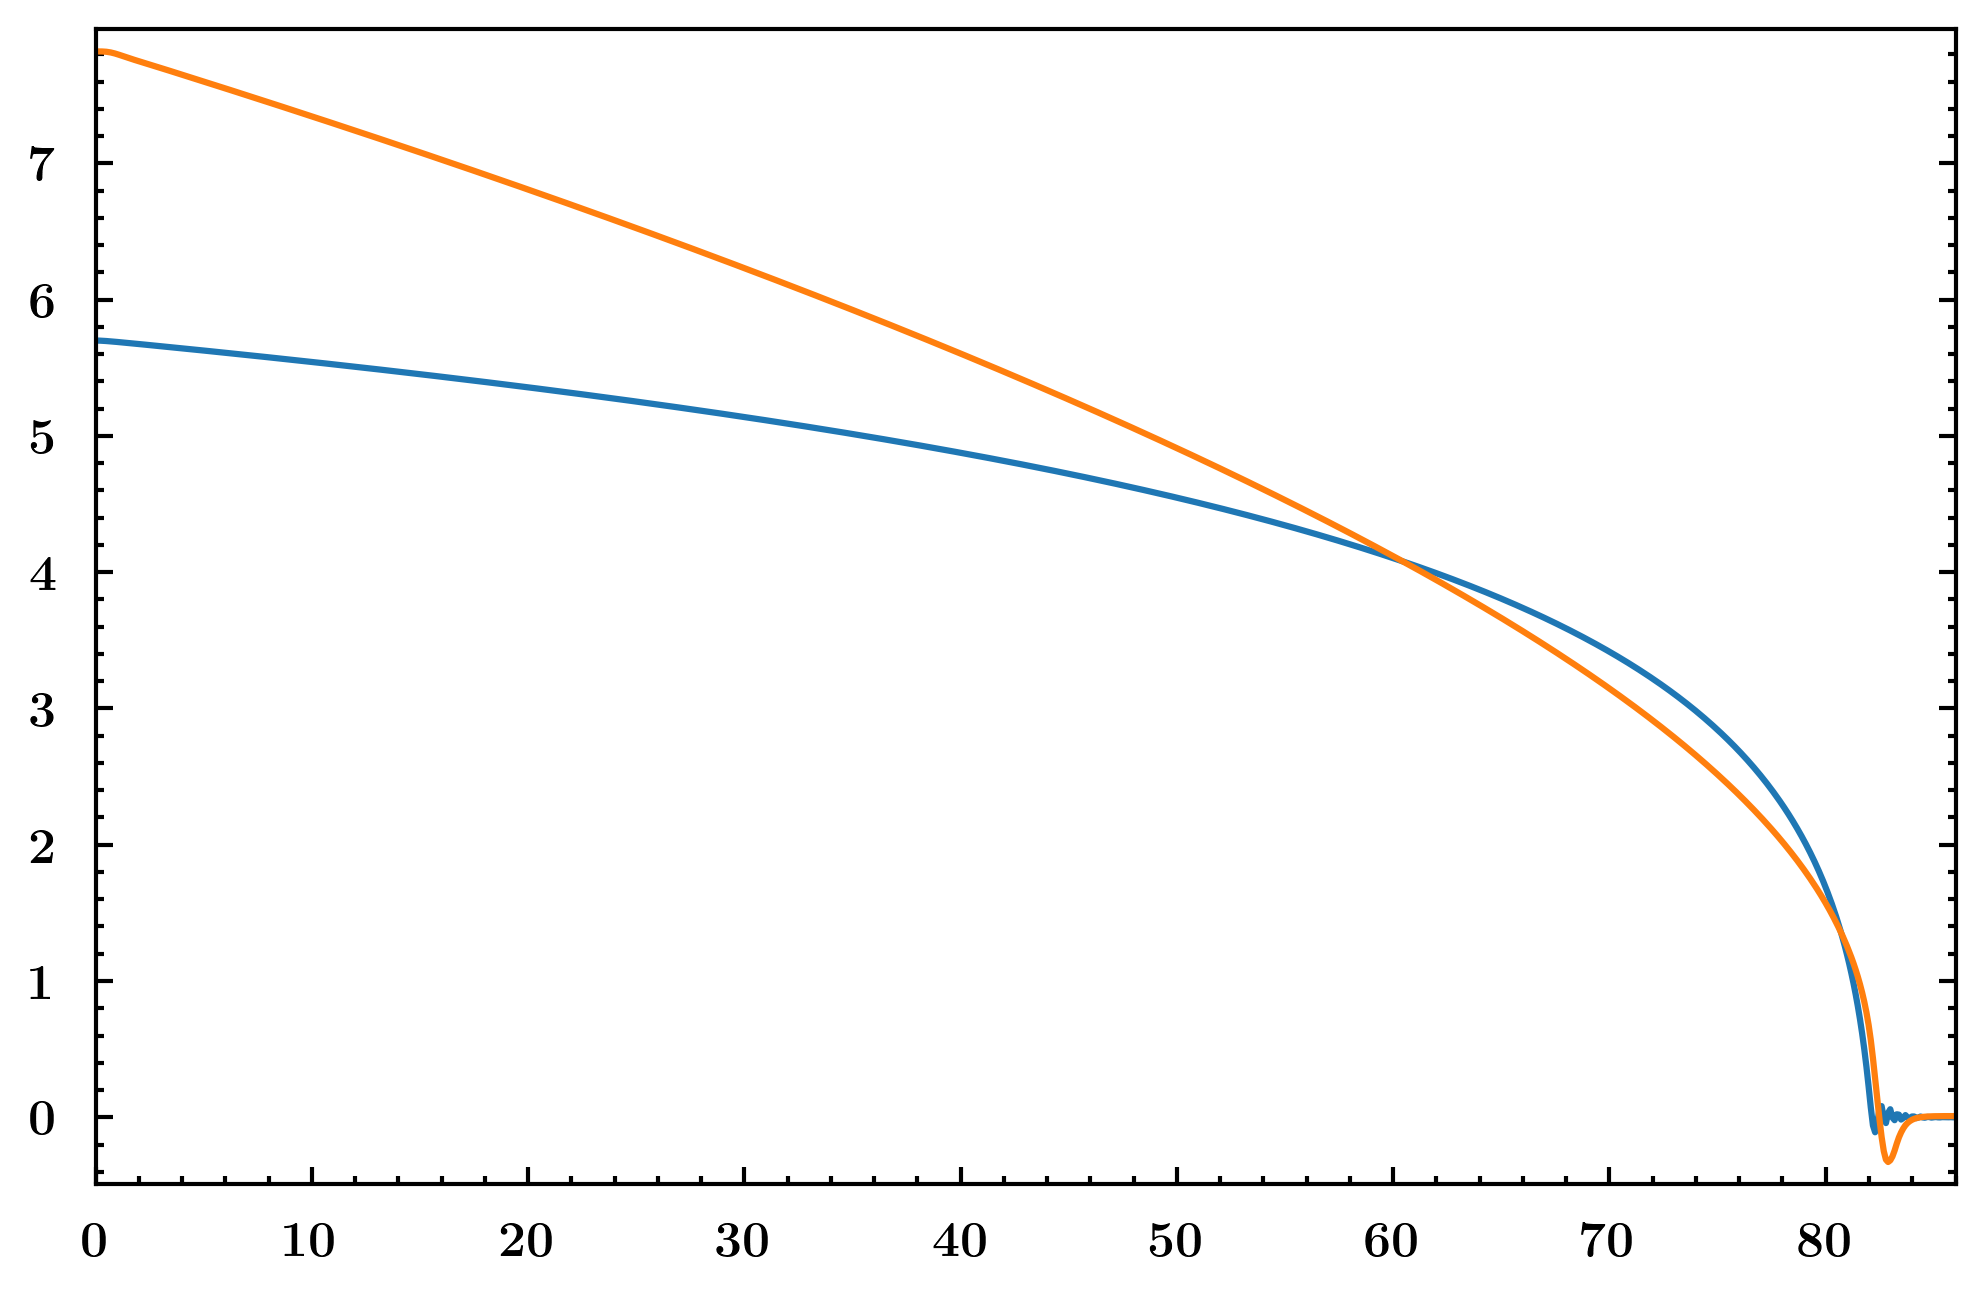

In [10]:
plt.plot(N, phi)
plt.plot(N, h)
plt.xlim(0, 86)